In [48]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [49]:
import scanpy as sc
import scvelo as scv
import lineagevi

In [50]:
adata = sc.read_h5ad('/Users/lgolinelli/git/lineageVI/notebooks/data/inputs/anndata/processed/pancreas.h5ad')

In [51]:
#adata.layers['velocity'] *=-1
#adata.obsm['velocity_gp'] *=-1

In [52]:
model_path = '/Users/lgolinelli/git/lineageVI/notebooks/data/outputs/pancreas/vae_velocity_model.pt'

linvi = lineagevi.utils.load_model(
    adata,
    model_path=model_path,
    map_location='cpu',
    n_hidden=128,
    training=False
)

In [53]:
linvi.get_model_outputs(
    adata=adata,
    n_samples=100,
    return_mean=True,
    return_negative_velo=True,
    base_seed=0,
    save_to_adata=True,
    unspliced_key='Mu',
    spliced_key='Ms',
    latent_key='z',
    nn_key='indices'
)

computing velocity graph (using 1/10 cores)
    finished (0:00:03) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


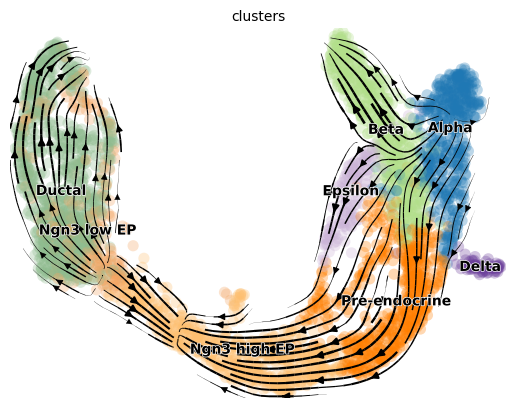

In [54]:
sc.pp.neighbors(adata)
scv.tl.velocity_graph(adata)
scv.pl.velocity_embedding_stream(adata, color='clusters')

In [56]:
adata_gp = lineagevi.utils.build_gp_adata(
    adata,
    model=linvi,
    n_samples=100,
    return_negative_velo=True,
    base_seed=0
)

computing velocity graph (using 1/10 cores)
    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


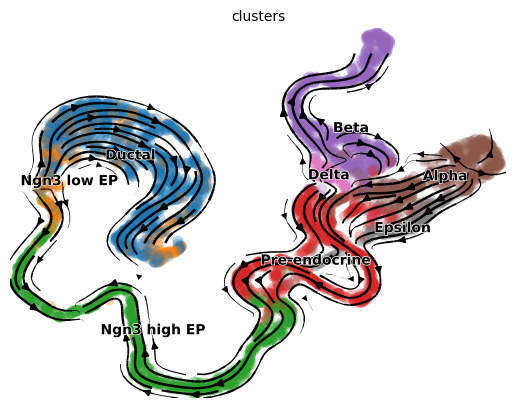

In [57]:
sc.pp.neighbors(adata_gp, use_rep='X')
scv.tl.velocity_graph(adata_gp, xkey='Ms')
scv.pl.velocity_embedding_stream(adata_gp, color='clusters')

computing velocity graph (using 1/10 cores)
    finished (0:00:00) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)
computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


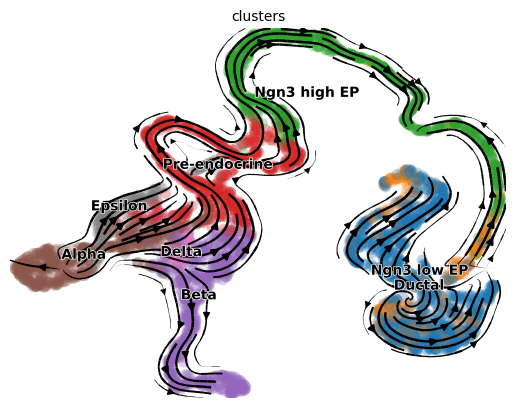

In [58]:
sc.pp.neighbors(adata_gp)
sc.tl.umap(adata_gp)
scv.tl.velocity_graph(adata_gp)
scv.pl.velocity_embedding_stream(adata_gp, color='clusters')